In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("35-data-Data_Prep.csv", index_col=0)
df

,iduser,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
0,10100018739106,NaN,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
1,10100037810674,NaN,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,...,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
2,10100036273719,NaN,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,4.0,4.0,0.0,0.0,2234363.0,0.0,0.0,2234363.0
3,10100027752244,NaN,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,5.0,6.0,2.0,0.0,602361.0,210114.0,0.0,812475.0
4,10100000624840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10100006151000,NaN,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,...,0.0,0.0,18.0,33.0,0.0,0.0,4307703.0,0.0,0.0,4307703.0
6,10100036301327,NaN,sdu,25.0,0.0,0.0,0.0,0.0,15.0,0.0,...,0.0,0.0,10.0,25.0,0.0,0.0,31817616.0,0.0,0.0,31817616.0
7,10100038731798,NaN,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10100039037854,NaN,sdu,4.0,0.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,15.0,4.0,0.0,0.0,191940.0,0.0,0.0,191940.0
9,10100038701419,mul,mdu,27.0,34.0,0.0,2.0,0.0,NaN,NaN,...,NaN,NaN,26.0,27.0,35.0,0.0,4229688.0,208649.0,0.0,4438337.0


In [41]:
df_ = df.drop(['iduser', 'mdutype', 'group'], axis = 1)

In [42]:
scaler = [preprocessing.StandardScaler() for i in df_.columns]

In [43]:
def std_based_outlier(df):
    s=set()
    for colname in df.columns:
        outlier = np.abs(df[colname][df[colname].notnull()]-df[colname][df[colname].notnull()].mean()) > (3*df[colname][df[colname].notnull()].std())
        s.update(outlier[outlier==True].index.tolist())
    df = df.iloc[list(set(range(len(df))).difference(s))]
    return df

def outlier_iqr(ys):
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 15])
    iqr = quartile_3 - quartile_1
    lower_bund = quartile_1 - (iqr*1.5)
    upper_bund = quartile_3 - (iqr*1.5)
    return np.where((ys > upper_bund)|(ys > lower_bund))


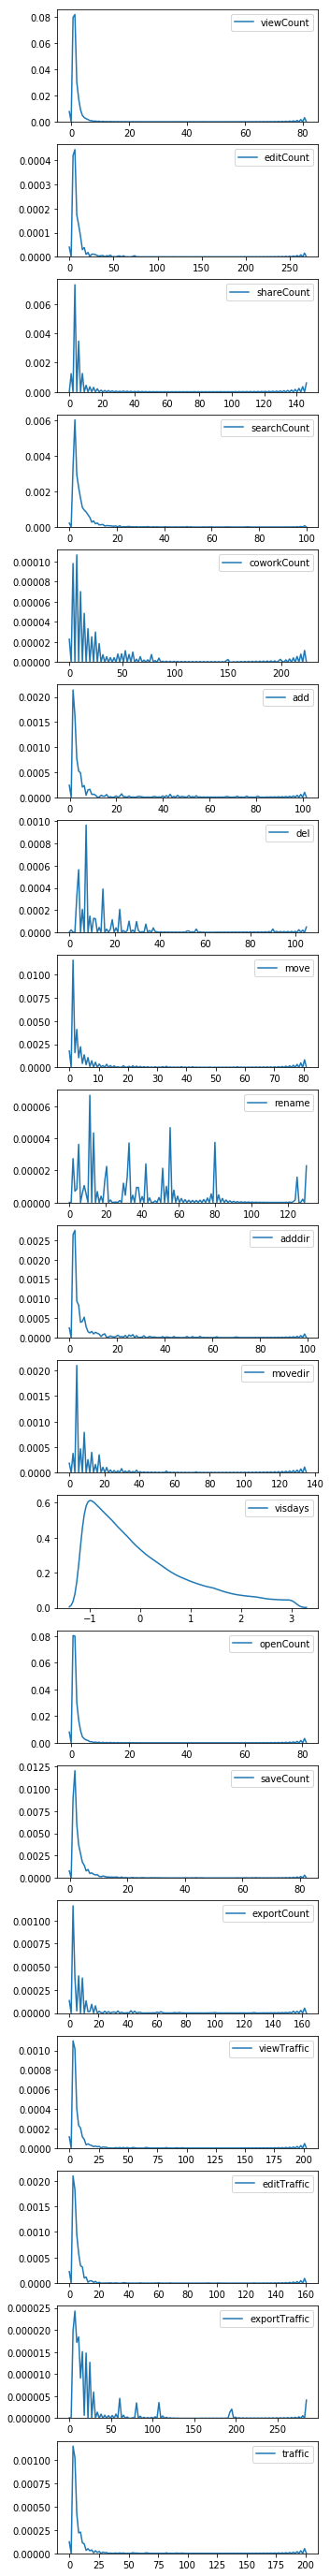

In [44]:
_, axes = plt.subplots(19, 1, figsize=(5,50))

for i , ax in enumerate(axes):
    colname = df_.columns[i]
    col = df_[colname][df_[colname].notnull()]
    col = col.values.reshape(col.shape[0],1)
    scaler[i].fit(col)
    sns.kdeplot(scaler[i].transform(col).reshape(-1), ax=ax, label = colname)

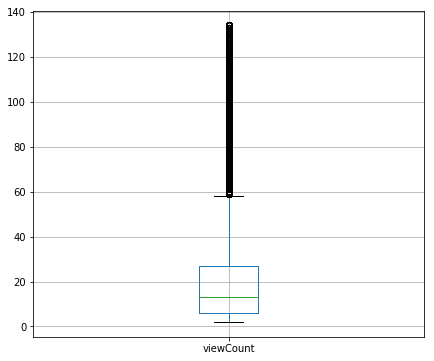

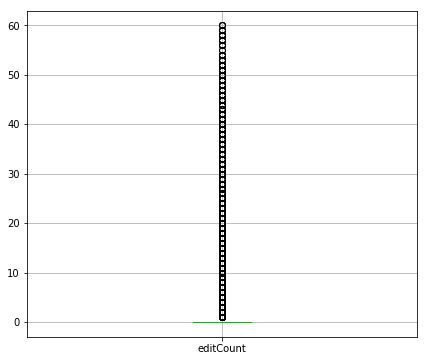

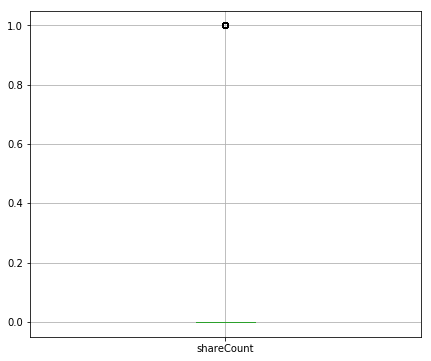

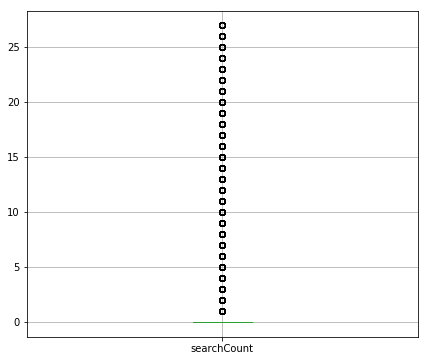

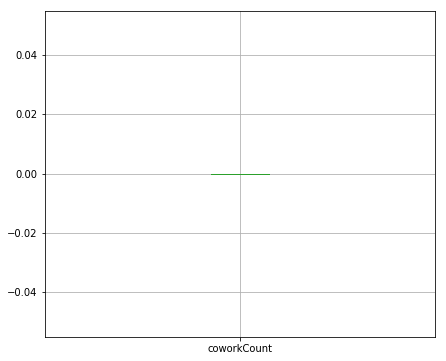

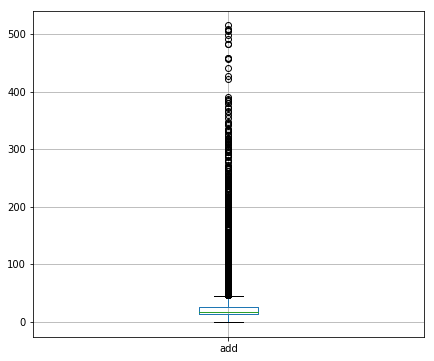

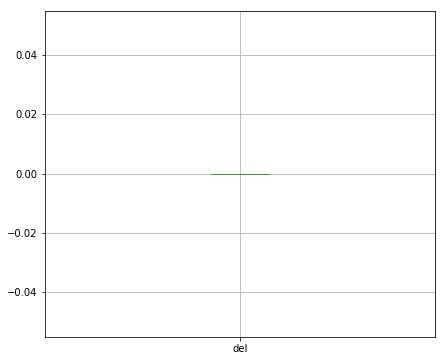

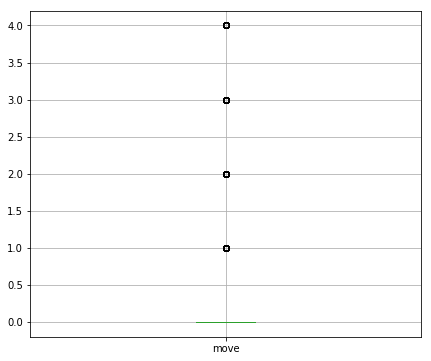

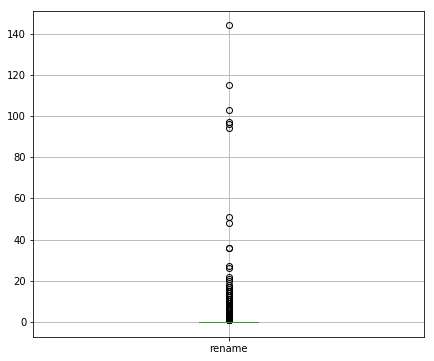

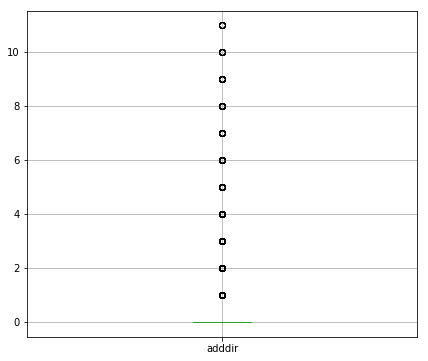

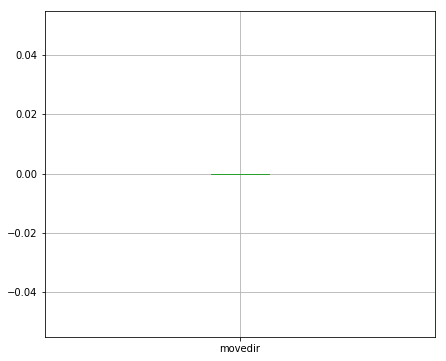

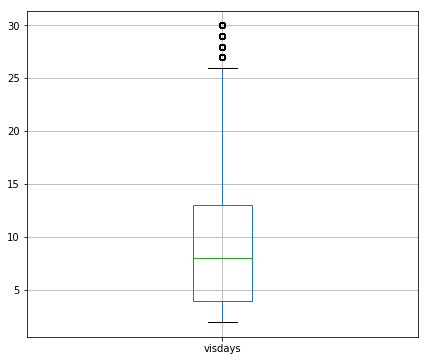

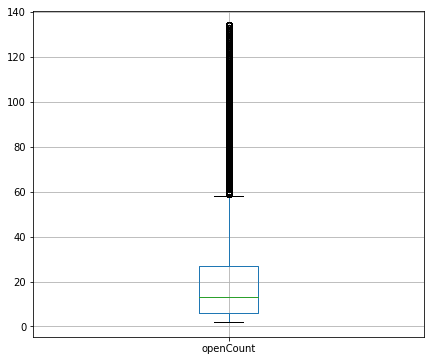

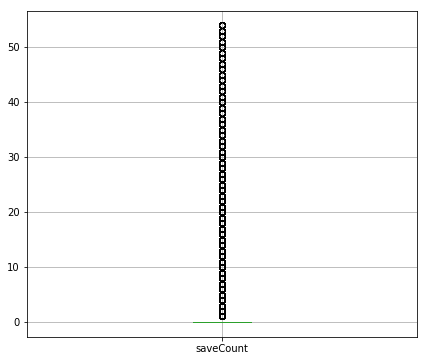

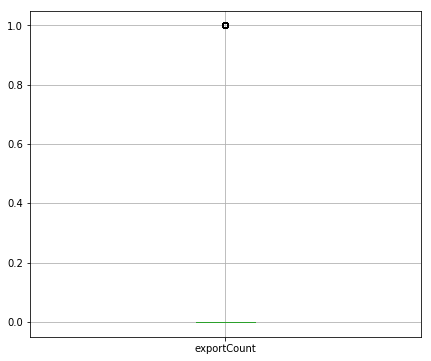

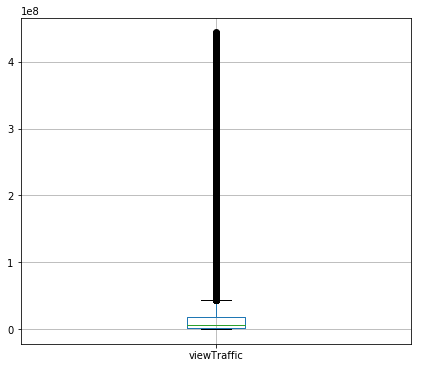

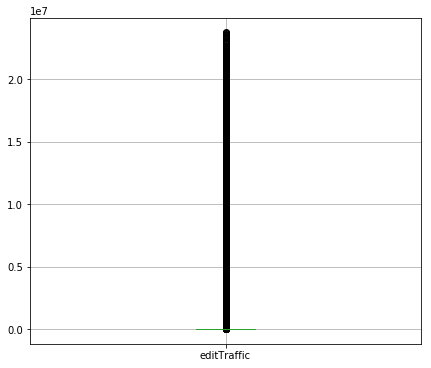

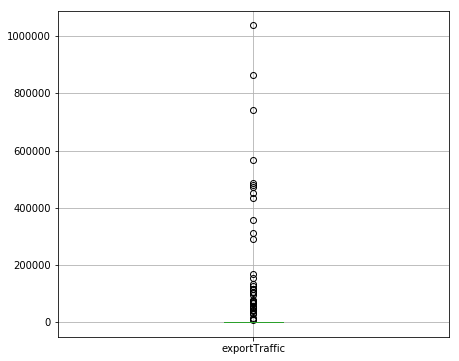

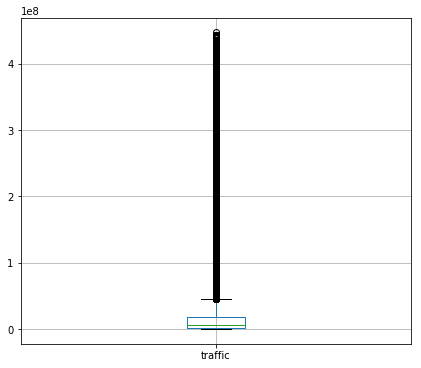

In [55]:
df_s = std_based_outlier(df_)
df_s.info

for i , ax in enumerate(axes):
    colname = df_.columns[i]
    plt.figure(figsize=(7,6))
    boxplot = df_s.boxplot(column = colname)
    plt.show

In [50]:
df_i = outlier_iqr(df_)
df_i

#print('outliers: ', df_i)

(array([     0,      0,      0, ..., 199999, 199999, 199999], dtype=int64),
 array([ 0, 11, 12, ..., 12, 15, 18], dtype=int64))